# Otimização de Funções utilizando Particle Swarm Optimization

In [ ]:
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import sin
from numpy import e
from numpy import pi
from numpy import meshgrid
import matplotlib.pyplot as plt
import random
import math

In [ ]:
#ackley
def ackley(x_arr):
    # x_min = (0, 0, ... 0)
    n = len(x_arr)
    return -20.0 * exp(-0.2 * sqrt((1/n) * sum([x**2 for x in x_arr]))) - exp((1/n)*sum([cos(2*pi*x) for x in x_arr])) + e + 20

#rastrigin
def rastrigin(x_arr):
    # x_min = (0, 0, ... 0)
    n = len(x_arr)
    return 10 * n + sum([(x**2 - 10 * cos(2 * pi * x)) for x in x_arr])

#schwefel
def schwefel(x_arr):
    # x_min = (421, 421, ... 421)
    n = len(x_arr)
    return 418.9829 * n - sum([(x*sin(sqrt(abs(x)))) for x in x_arr])

#rosenbrock
def rosenbrock(x_arr):
    # x_min = (1, 1, ... 1)
    n = len(x_arr)
    return sum([(100*(x_arr[i+1] + (x_arr[i]**2)))**2 + (x_arr[i] - 1)**2 for i in range(len(x_arr)-1)])

#levy
def levy(x_arr):
    # x_min = (1, 1, ... 1)
    n = len(x_arr)
    w_arr = [1+((x_arr[i]-1)/4) for i in range(len(x_arr))]
    return sin(pi*w_arr[1])**2 + sum([((w_arr[i]-1)**2)*(1+10*(sin(pi*w_arr[i]+1)**2)) for i in range(n-1)]) + (((w_arr[n-1]-1)**2)*(1+sin(2*pi*w_arr[n-1])**2))

In [ ]:
class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.best_pos_i=[]
        self.best_fit_i=-1
        self.fit_i=-1 
        
        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.fit_i=costFunc(self.position_i)

        if self.fit_i < self.best_fit_i or self.best_fit_i==-1:
            self.best_pos_i=self.position_i
            self.best_fit_i=self.fit_i

    # update new particle velocity
    def update_velocity(self,best_pos_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.best_pos_i[i]-self.position_i[i])
            vel_social=c2*r2*(best_pos_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(bounds)
        best_fit_g=-1
        best_pos_g=[]

        swarm=[]
        for i in range(0,num_particles):
            random_position = [random.uniform(*bound) for bound in bounds]
            swarm.append(Particle(random_position))

        i=0
        while i < maxiter:
            
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                if swarm[j].fit_i < best_fit_g or best_fit_g == -1:
                    best_pos_g=list(swarm[j].position_i)
                    best_fit_g=float(swarm[j].fit_i)

            for j in range(0,num_particles):
                swarm[j].update_velocity(best_pos_g)
                swarm[j].update_position(bounds)
            i+=1

        print ('FINAL:')
        #print (best_pos_g)
        print (best_fit_g)


functions = [ackley, rastrigin, schwefel, rosenbrock, levy]
bounds = [[(-32.768,32.768)]*30, [(-5.12,5.12)]*30, [(-500,500)]*30, [(-2.048, 2.048)]*30, [(-10,10)]*30] # input bounds [[(x1_min,x1_max),(x2_min,x2_max)...]]
for i in range(len(functions)):
    function = functions[i]
    bound = bounds[i]
    print(function.__name__)
    PSO(function,bound,num_particles=300,maxiter=5000)
    print()
pass

ackley
FINAL:
5.562925577510494

rastrigin
FINAL:
234.09846234237676

schwefel
FINAL:
6243.01181399487

rosenbrock
FINAL:
32.067682470674896

levy
FINAL:
41.04101546513923



# Otimização de Funções utilizando Estratégia Evolutiva

Importando aqui alguns libraries que serão usadas no decorrer do código


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from tqdm import tqdm

import tensorflow as tf
from tensorflow.python.client import device_lib

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [ ]:
tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 301458354267477562
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 696508613390450364
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

# Ackley Function

A função de Ackley é dada da seguinte forma: 

$$
f(x_1, ..., x_n)
=
a
+
e
-a\exp\left\{-b
\sqrt{\dfrac{1}{d}
\sum_{i=1}^d \limits x^2_i}
\right\}
-
\exp\left\{
\dfrac{1}{d}
\sum_{i=1}^d \limits
\cos(c x_i)
\right\}.
$$


Onde os valores recomendados para as variáveis são: 
a = 20,
b = 0.2,
c = $2\pi$
e d = 30 pelo que foi definido no projeto

Definindo aqui nossa função Ackley apenas para visualização e plotagem com os valores padrões e o número de dimensões especificado

In [ ]:
#CONSTANTES DA FUNÇÃO DE ACKLEY 
a_ackley = 20
b_ackley = 0.2
c_ackley = 2*np.pi
d = 30 #30 dimensões para todas funções

def ackley_func(x, y):
    return a_ackley + np.exp(1) - a_ackley*np.exp(-b_ackley*np.sqrt((1/d)*(x**2+y**2))) - np.exp((1/d)*(np.cos(c_ackley*x)+np.cos(c_ackley*y)))

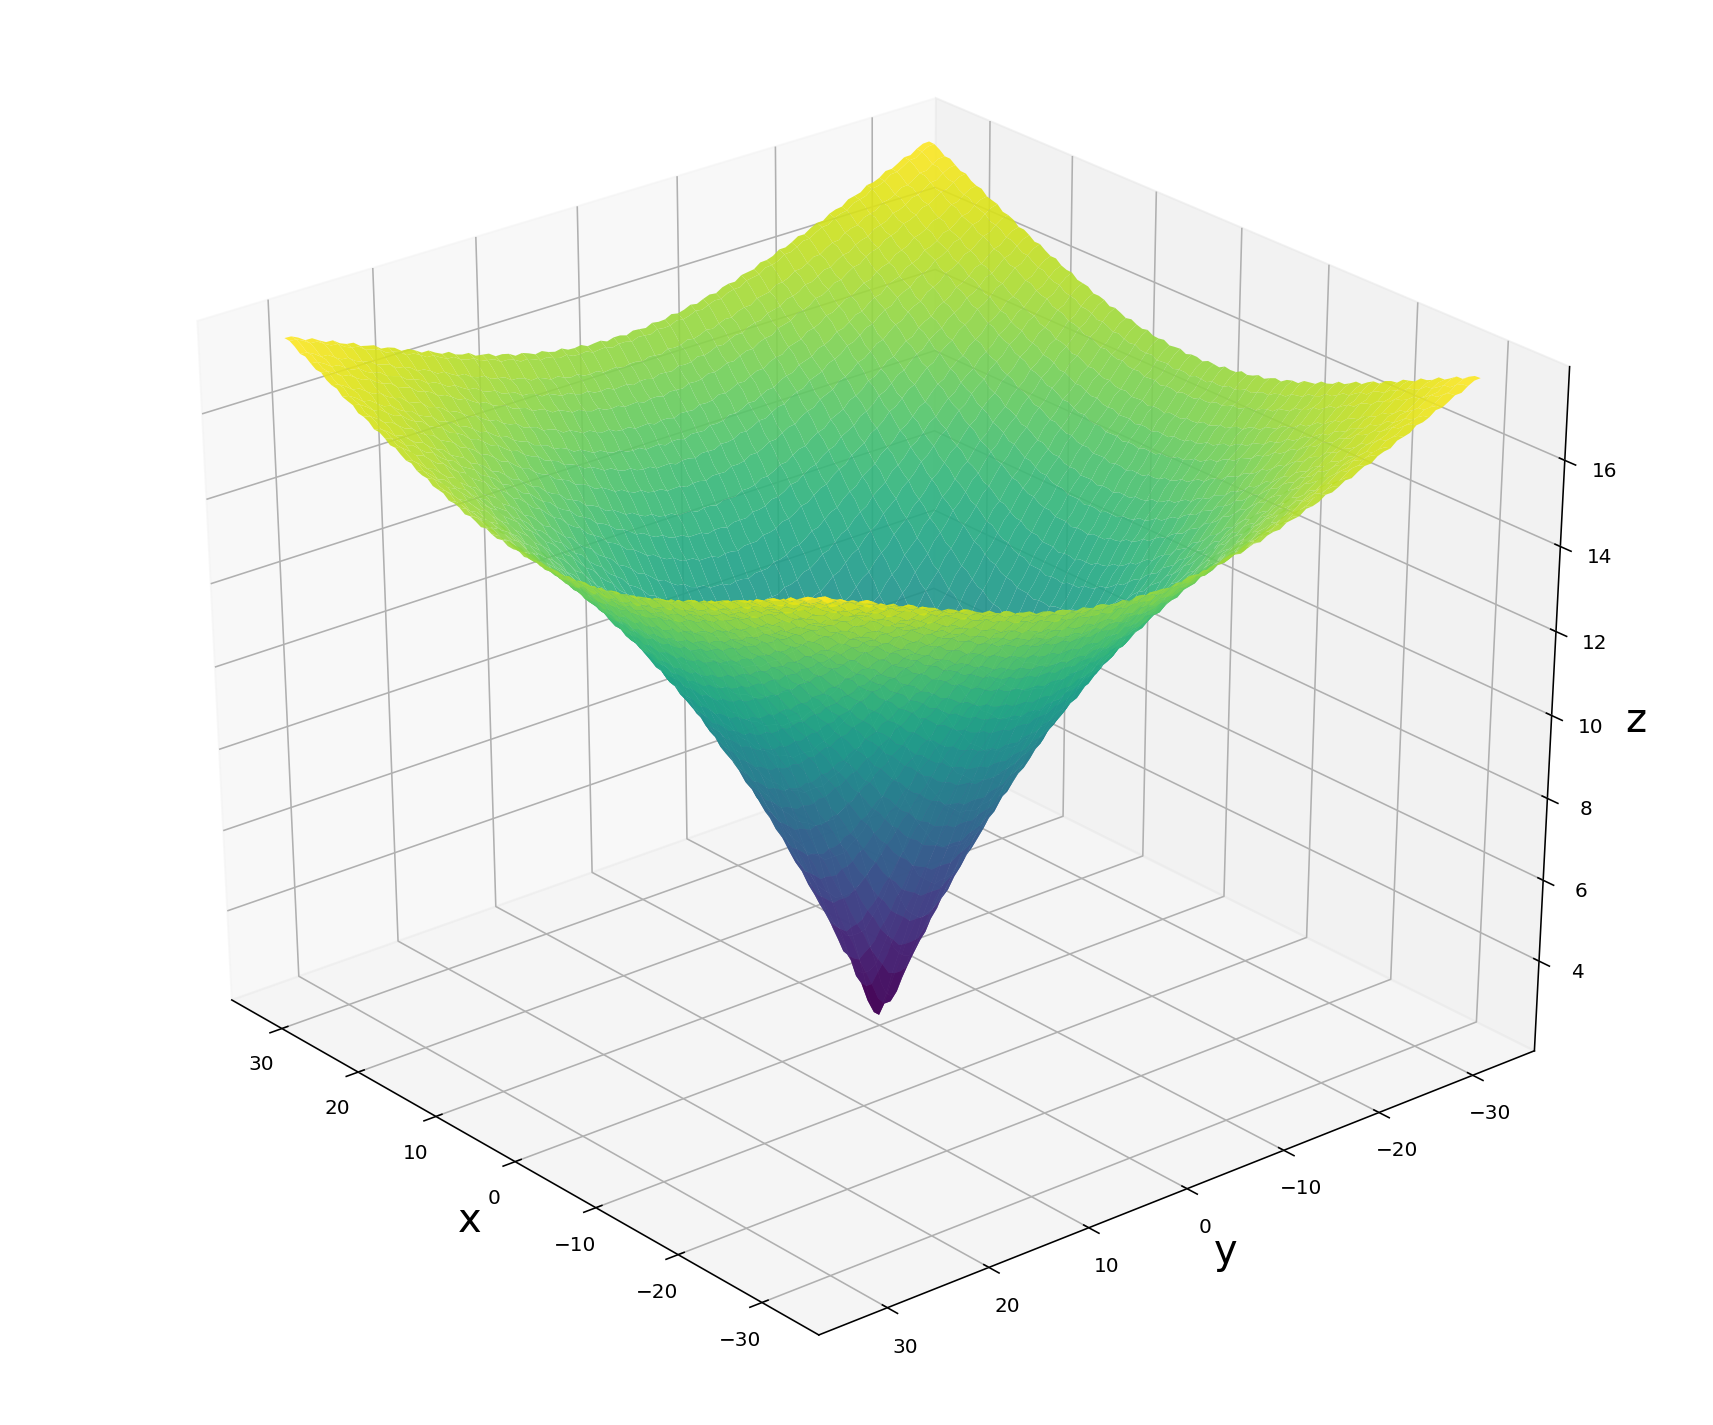

In [ ]:
fig = plt.figure(figsize=(12,10))

# Make grid
x = np.linspace(-32, 32, 100)
y = np.linspace(-32, 32, 100)
X, Y = np.meshgrid(x, y)
Z = ackley_func(X, Y)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()

Agora iremos definí-la de modo a utilizar em nossos algoritmos

In [ ]:
def ackley(x_arr):
    # x_min = (0, 0, ... 0)
    d = len(x_arr)
    return -20.0 * exp(-0.2 * sqrt((1/d) * sum([x**2 for x in x_arr]))) - exp((1/d)*sum([cos(2*pi*x) for x in x_arr])) + e + 20

Em nosso primeiro experimento iremos utilizar a Estratégia Evolutiva, que consiste basicamente do uso de Algoritmo Genético utilizando a Função de Ackley como avaliador de nossos indivíduos

Para isso iremos definir nossa classe de indivíduos abaixo:

In [ ]:
class Individual:
    def __init__(self, search_space, chromosome_len):
        self.search_space = search_space
        self.chromosome_len = chromosome_len 
        self.chromosome = np.array([self.create_gene(j) for j in range(chromosome_len)])
        self.target_value = None # valor da função objetivo usando o dado indivíduo
        self.fitness = None # o valor de aptidão de um indivíduo em relação a outros
        self.name = '#' + ''.join(map(str, np.random.randint(0,9, size=7).tolist()))
    
    def create_gene(self, pos):
        for i in range(0,30):
          return np.random.uniform(self.search_space[pos][i])
    
    def __repr__(self):
        chromosome = '; '.join(list(map(str, test_function.fittest_individual.chromosome.tolist())))
        return f'{self.name}: chromosome = ({(chromosome)});\ntarget_value = {self.target_value}'

## Os seguintes parâmetros serão utilizados na inicilização do nosso algoritmo genético:

*   **population_siz**e — número de indivíduos de uma geração
*  **k** — número de indivíduos para reproduzir
*   **mutation_rate** — taxa de mutação
*   **max_iter** — número máximo de evoluções de geração (novas gerações)

## Teremos uma função de busca global para definir qual o ponto ótimo da função utilizada para otimização. Para ela teremos o seguinte parâmetro:


*   **search_space** - área de busca para o ponto ótimo. Especificado como uma lista de tuplas, onde a tupla é o intervalo de um argumento da função.
 ps.: Esse mesmo parâmetro será usado na hora de criar a população

## Teremos também função **evaluate_population** para avaliar os nossos indivíduos baseado na função de otimização escolhida. Para ela teremos o seguinte parâmetro:

*   **func** - uma função otimizável que recebe uma lista como argumentos

## Teremos também outra função **normalize** definida para normalizar os valores que irá utilizar os parâmetros:


*   **z** - valor escalonado
*   **F_best** - melhor valor da função objetivo
*   **F_worst** - pior valor da função objetivo

## Teremos também uma função **crossover** para realizar a operação de cruzamento entre indivíduos que terá os seguintes parâmetros:

*   **parent_fitted** — um dos melhores indivíduos
*   **parent_random** — um indivíduo aleatório

## Por último temos uma função **mutate** para realizar mutação dos indivíduos que tem como parâmetro: 

*   **individual** - o indivíduo a sofrer mutação














In [ ]:
class GeneticAlgorithm:
    def __init__(self, population_size=1000, k=200, mutation_rate=0.1, max_iter=100):
        self.population_size = population_size
        self.k = k
        self.mutation_rate = mutation_rate
        self.max_iter = max_iter
        
        self.search_space = None 
        self.chromosome_len = None # tamanho do cromossomo
        self.best_individuals = None # k indivíduos com melhor fitness
        self.fittest_individual = None # o melhor indivíduo da geração
        self.population = None
        self.best_target_value_history = None
        
    def search_global(self, search_space, func):
        self.search_space = np.array(search_space)
        self.chromosome_len = len(self.search_space)
        self.best_target_value_history = []

        # criando a primeira geração
        self.population = self.create_population(self.search_space)
        
        # passar pelas iterações de evolução
        for i in tqdm(range(self.max_iter)):
            # avaliar os nossos indivíduos da população
            self.evaluate_population(func)
            # selecionando os indivíduos mais aptos
            self.selection()
            
            self.best_target_value_history.append(self.fittest_individual.target_value)
            for idx in range(self.k, self.population_size):
                # escolhe aleatoriamente um dos melhores indivíduos
                select_fitted_individual = np.random.choice(self.best_individuals)
                # criar um descendente e substituir o antigo indivíduo por ele
                offspring = self.crossover(select_fitted_individual,
                                           self.population[idx])
                self.population[idx].chromosome = offspring
            
            # mutar todos os indivíduos, exceto o mais apto
            for individual in self.population[1:]:
                self.mutate(individual)
        
        return self.fittest_individual
            
    def create_population(self, search_space):
        self.search_space = np.array(search_space)
        self.chromosome_len = len(self.search_space)

        return np.array([Individual(self.search_space,
                                    self.chromosome_len) for i in range(self.population_size)])

    def evaluate_population(self, func):
        F = []
        
        for individual in self.population:
            individual.target_value = func(individual.chromosome)
            F.append(individual.target_value)

        for individual in self.population:
            individual.fitness = self.normalize(individual.target_value,
                                                min(F), max(F))

    def normalize(self, z, F_best, F_worst):
        return (z - F_worst) / (F_best - F_worst)

    def selection(self):
        self.population = sorted(self.population,
                                 key=lambda individual: individual.fitness, reverse=True)
        self.best_individuals = self.population[:self.k]
        self.fittest_individual = self.population[0]

    def crossover(self, parent_fitted, parent_random):
        return np.array([parent_random.chromosome[j]
                         if np.random.uniform(0, 1) < parent_random.fitness
                         else parent_fitted.chromosome[j]
                         for j in range(parent_fitted.chromosome_len)])

    def mutate(self, individual):
        individual_hat_chromosome = np.asarray([])
 
        for j in range(individual.chromosome_len):
            j_hat = individual.chromosome[j] + np.random.uniform(-self.mutation_rate, 
                                                                  self.mutation_rate)
            # verificação caso o gene vá além do hipercubo 
            j_hat = min(max(j_hat, self.search_space[j][0]), self.search_space[j][1])
            individual_hat_chromosome = np.append(individual_hat_chromosome, j_hat)
      
        individual.chromosome = individual_hat_chromosome

Rodando para função de Ackley:

In [ ]:
np.random.seed(13)
test_function = GeneticAlgorithm(k=100, population_size=1000, mutation_rate=0.2, max_iter=300)
test_function.search_global(search_space=[(-32.768,32.768)]*30, func=ackley)


100%|██████████| 300/300 [03:14<00:00,  1.54it/s]


#5338508: chromosome = (0.03420082494911725; -0.027620055507322022; -0.19656434423234437; 0.13807668096492928; -0.05631098582405164; -0.10055426393292488; 0.24897016506007147; 0.0022226739614290003; -0.13904505867339123; -0.003121203399336331; -0.06634271777269149; 0.023962712090917437; 0.09295329961763704; -0.021850402222005072; -0.29786973639154174; -0.06960946561784112; -0.06415162636579953; 0.08360552153575183; 0.10451536720470869; 0.14847123797682082; -0.12016433110647658; -0.18657885667096413; 0.017134961069803833; -0.009356123315695797; 0.10334850367610299; -0.059209228335050795; -0.08335888472010944; -0.04605056312600295; -0.22716014223464248; -0.017570770897879867);
target_value = 1.0650363461003707

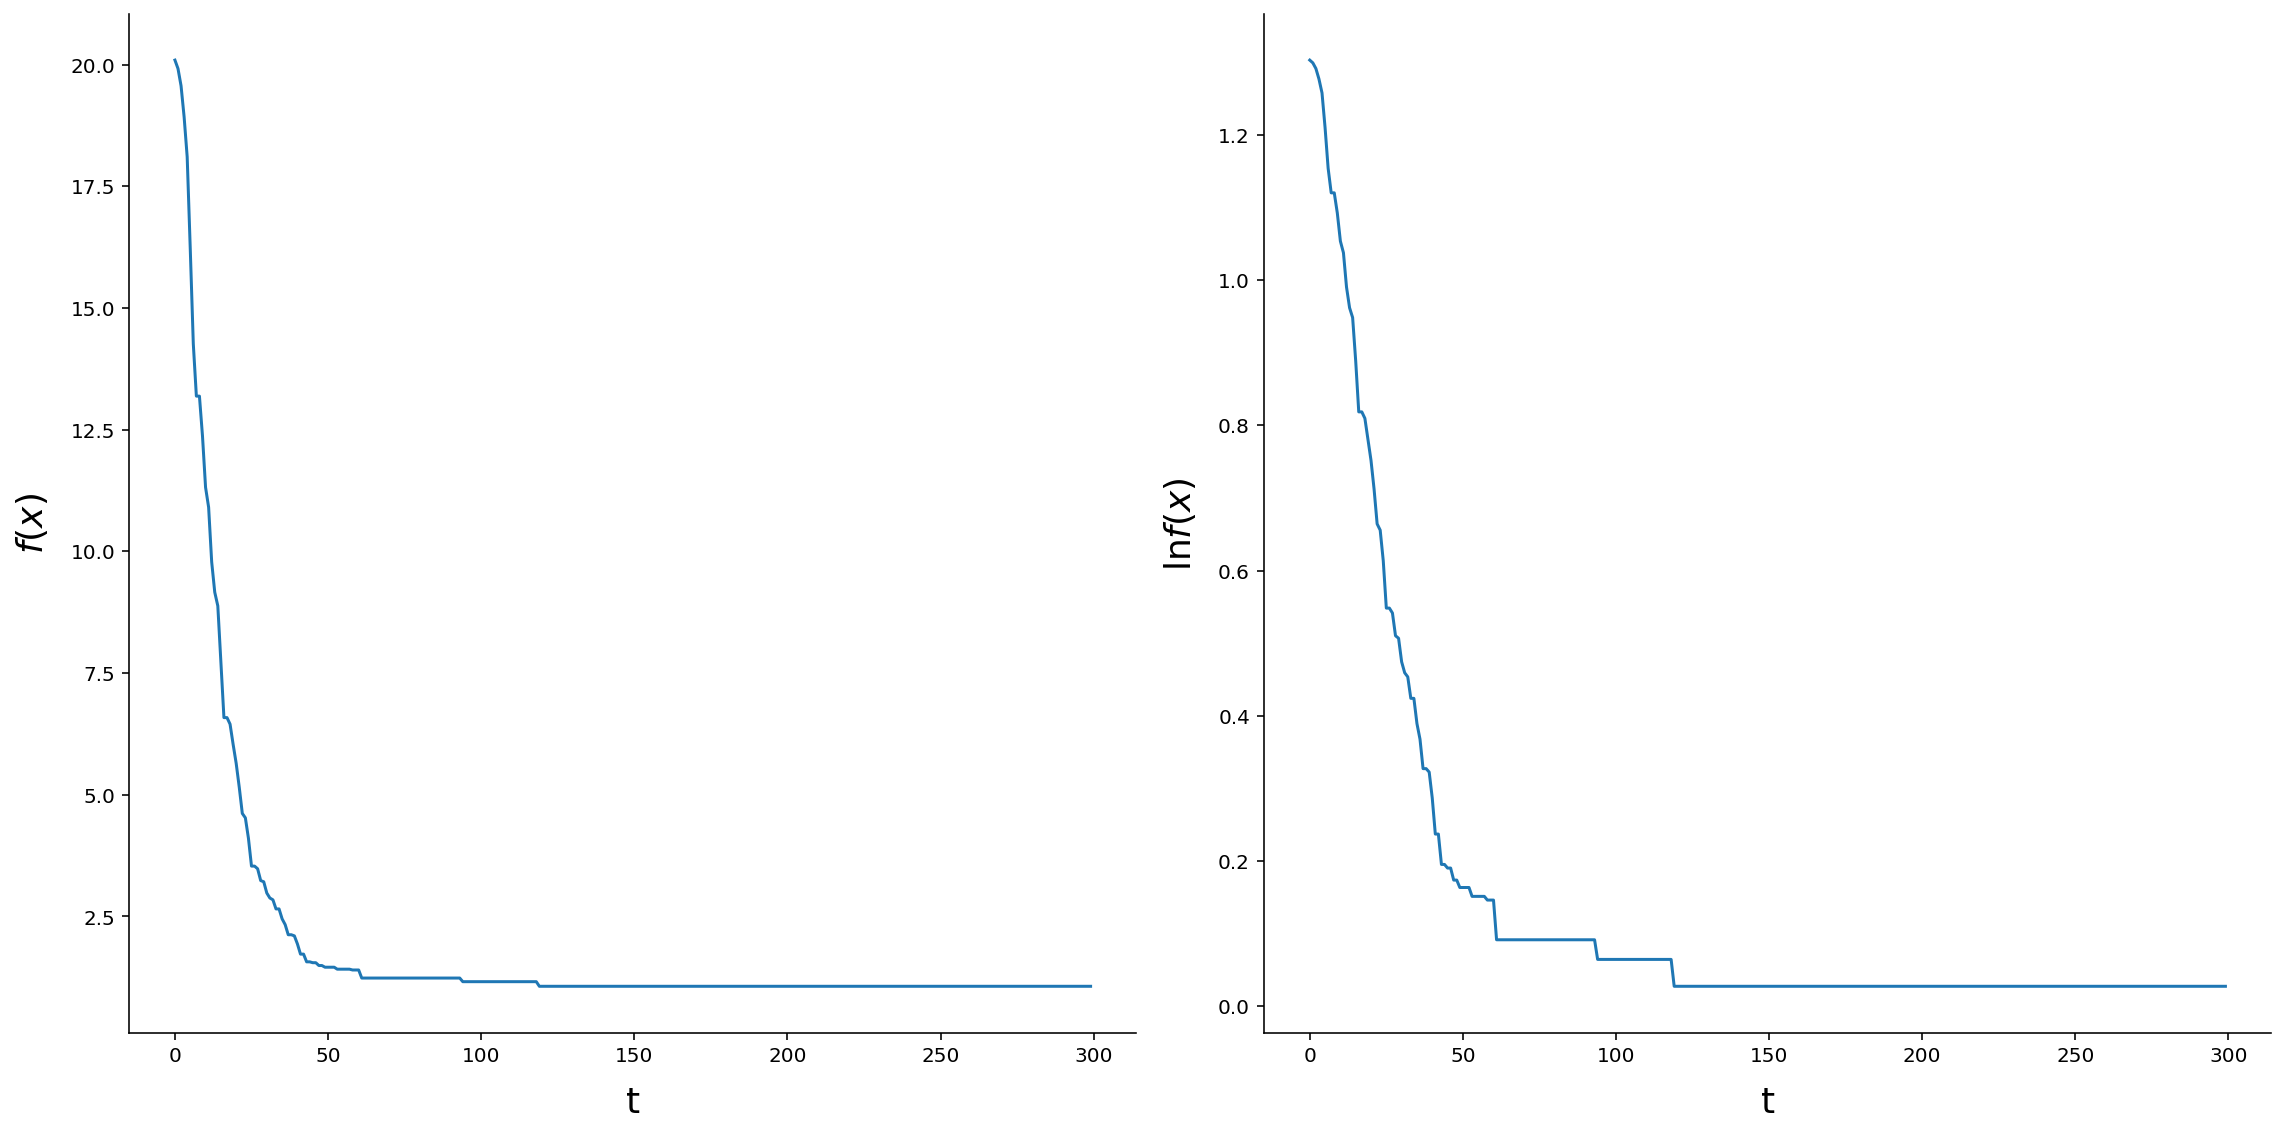

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(test_function.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(test_function.best_target_value_history))

fig.tight_layout()

# Rastrigin Function

A função de Rastrigin é dada da seguinte forma: 

$$
f(x_1, ..., x_n)
=
10d
+
\sum_{i=1}^d
\left[x^2_i - 10*
\cos(2\pi x_i)
\right]
$$

Onde d = 30 baseado nas especificações do projeto

In [ ]:
def rastrigin_func(x, y):  # rast.m
    return 10*d + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))

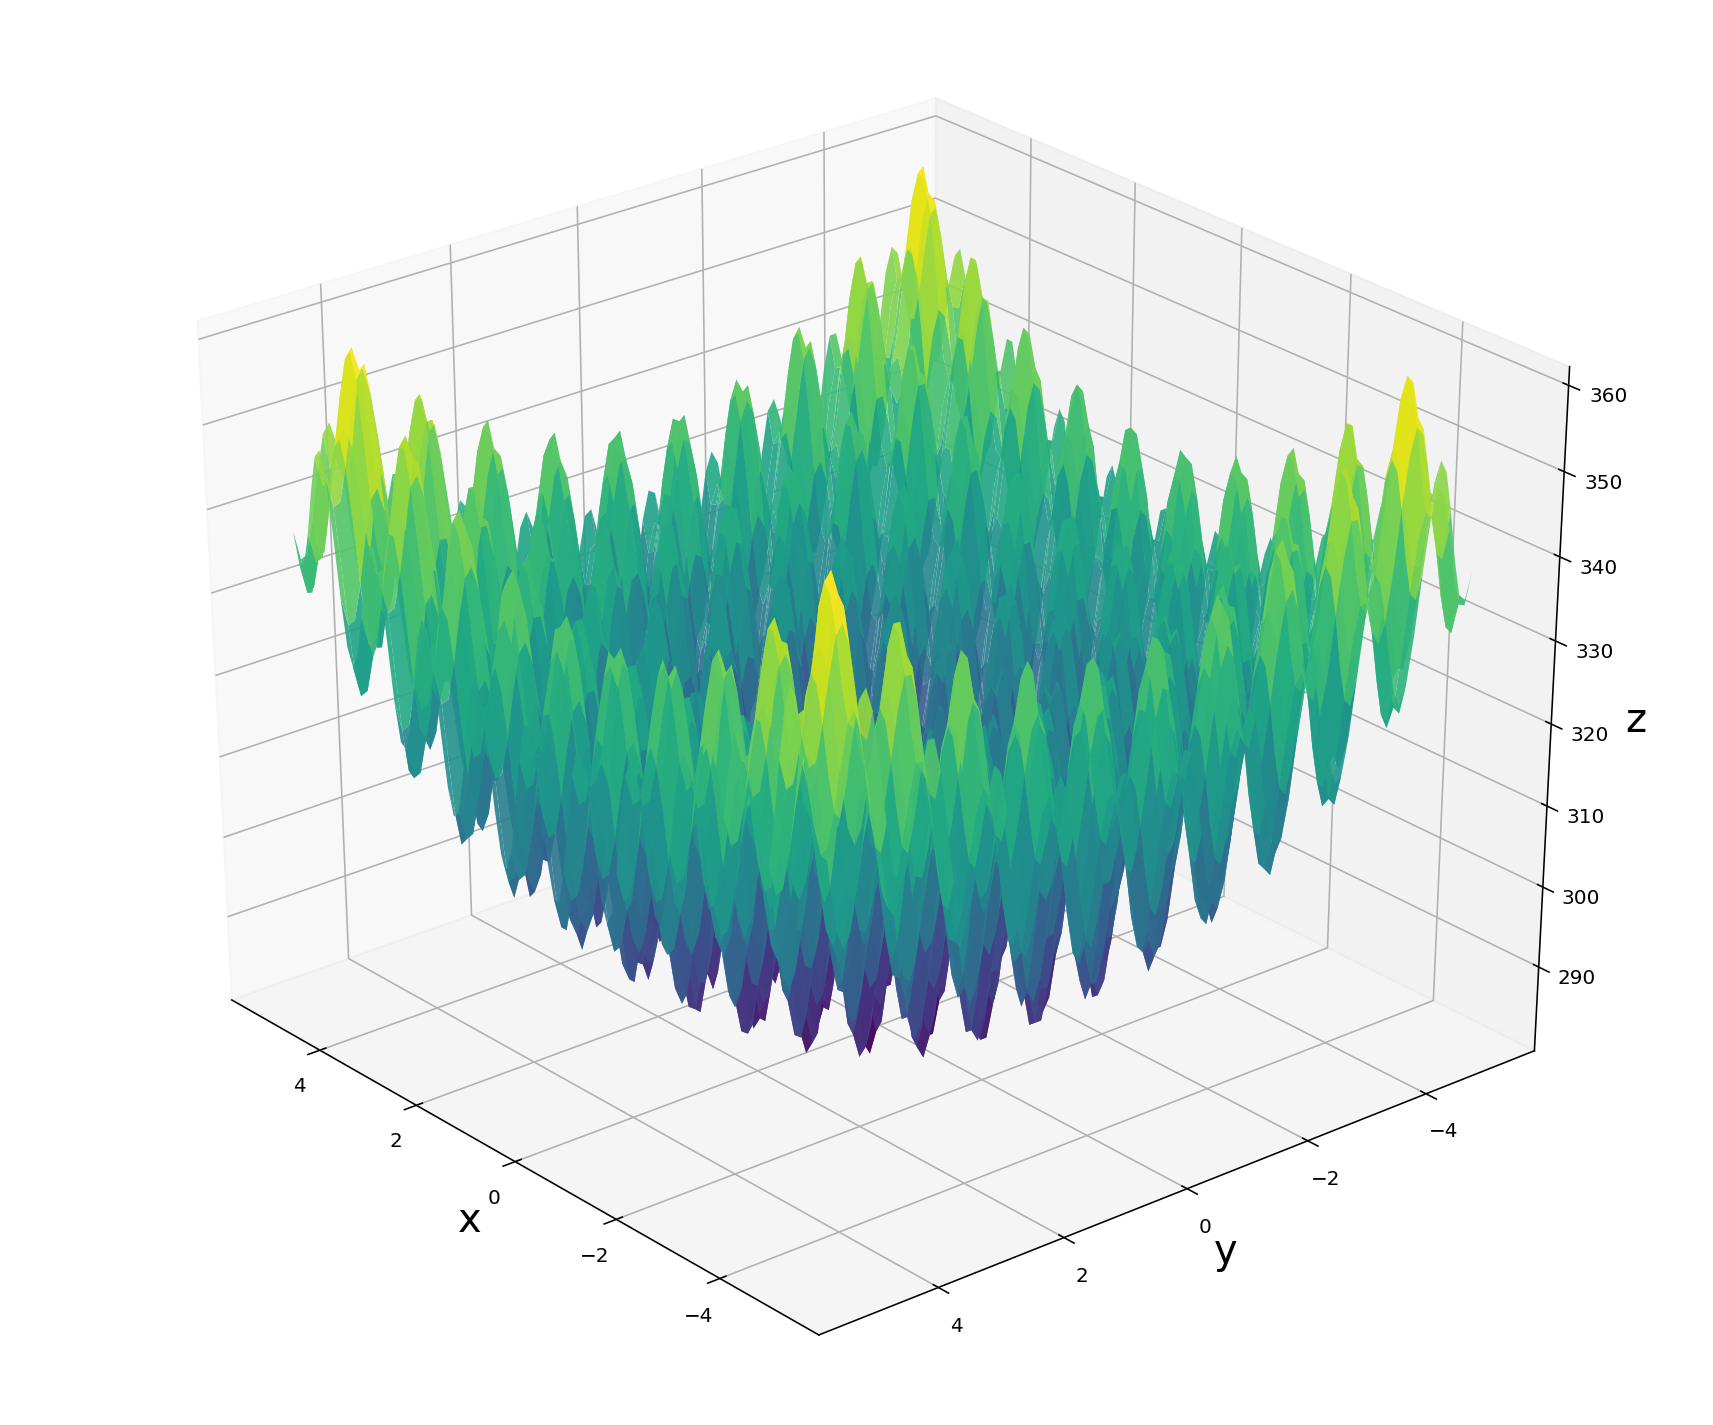

In [ ]:
fig = plt.figure(figsize=(12,10))

# Make grid
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_func(X, Y)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()

Rodando agora nosso algoritmo genético com a função Rastrigin como otimizização

In [ ]:
np.random.seed(13)
test_function = GeneticAlgorithm(k=300, population_size=1000, mutation_rate=0.2, max_iter=300)
test_function.search_global(search_space=[(-5.12, 5.12)]*30, func=rastrigin)

100%|██████████| 300/300 [03:56<00:00,  1.27it/s]


#3270838: chromosome = (-1.1310749375544733; 0.8945033418828847; 0.02680821271993808; -0.027210213488350704; 0.027380693503237186; -0.7777476958559532; 0.05389598564491603; -0.32442838448325756; 1.1215995077131669; -0.7982113202445401; -0.2848962498593366; -0.030760042215824346; 0.8534372204594987; -0.1581713702938111; 0.07997872192201996; -0.04532665879507339; -0.013222079788046709; -1.183093173405172; 0.011967705110366572; -0.04926085620180255; 1.0287486984353056; -0.15696686910336377; -0.0484039208446255; -0.7739057178761811; -0.1281048026271157; 0.889252760169767; -0.18740331090173956; 0.9794868012038593; -1.065958375124066; -1.1210212946086286);
target_value = 109.51174390582617

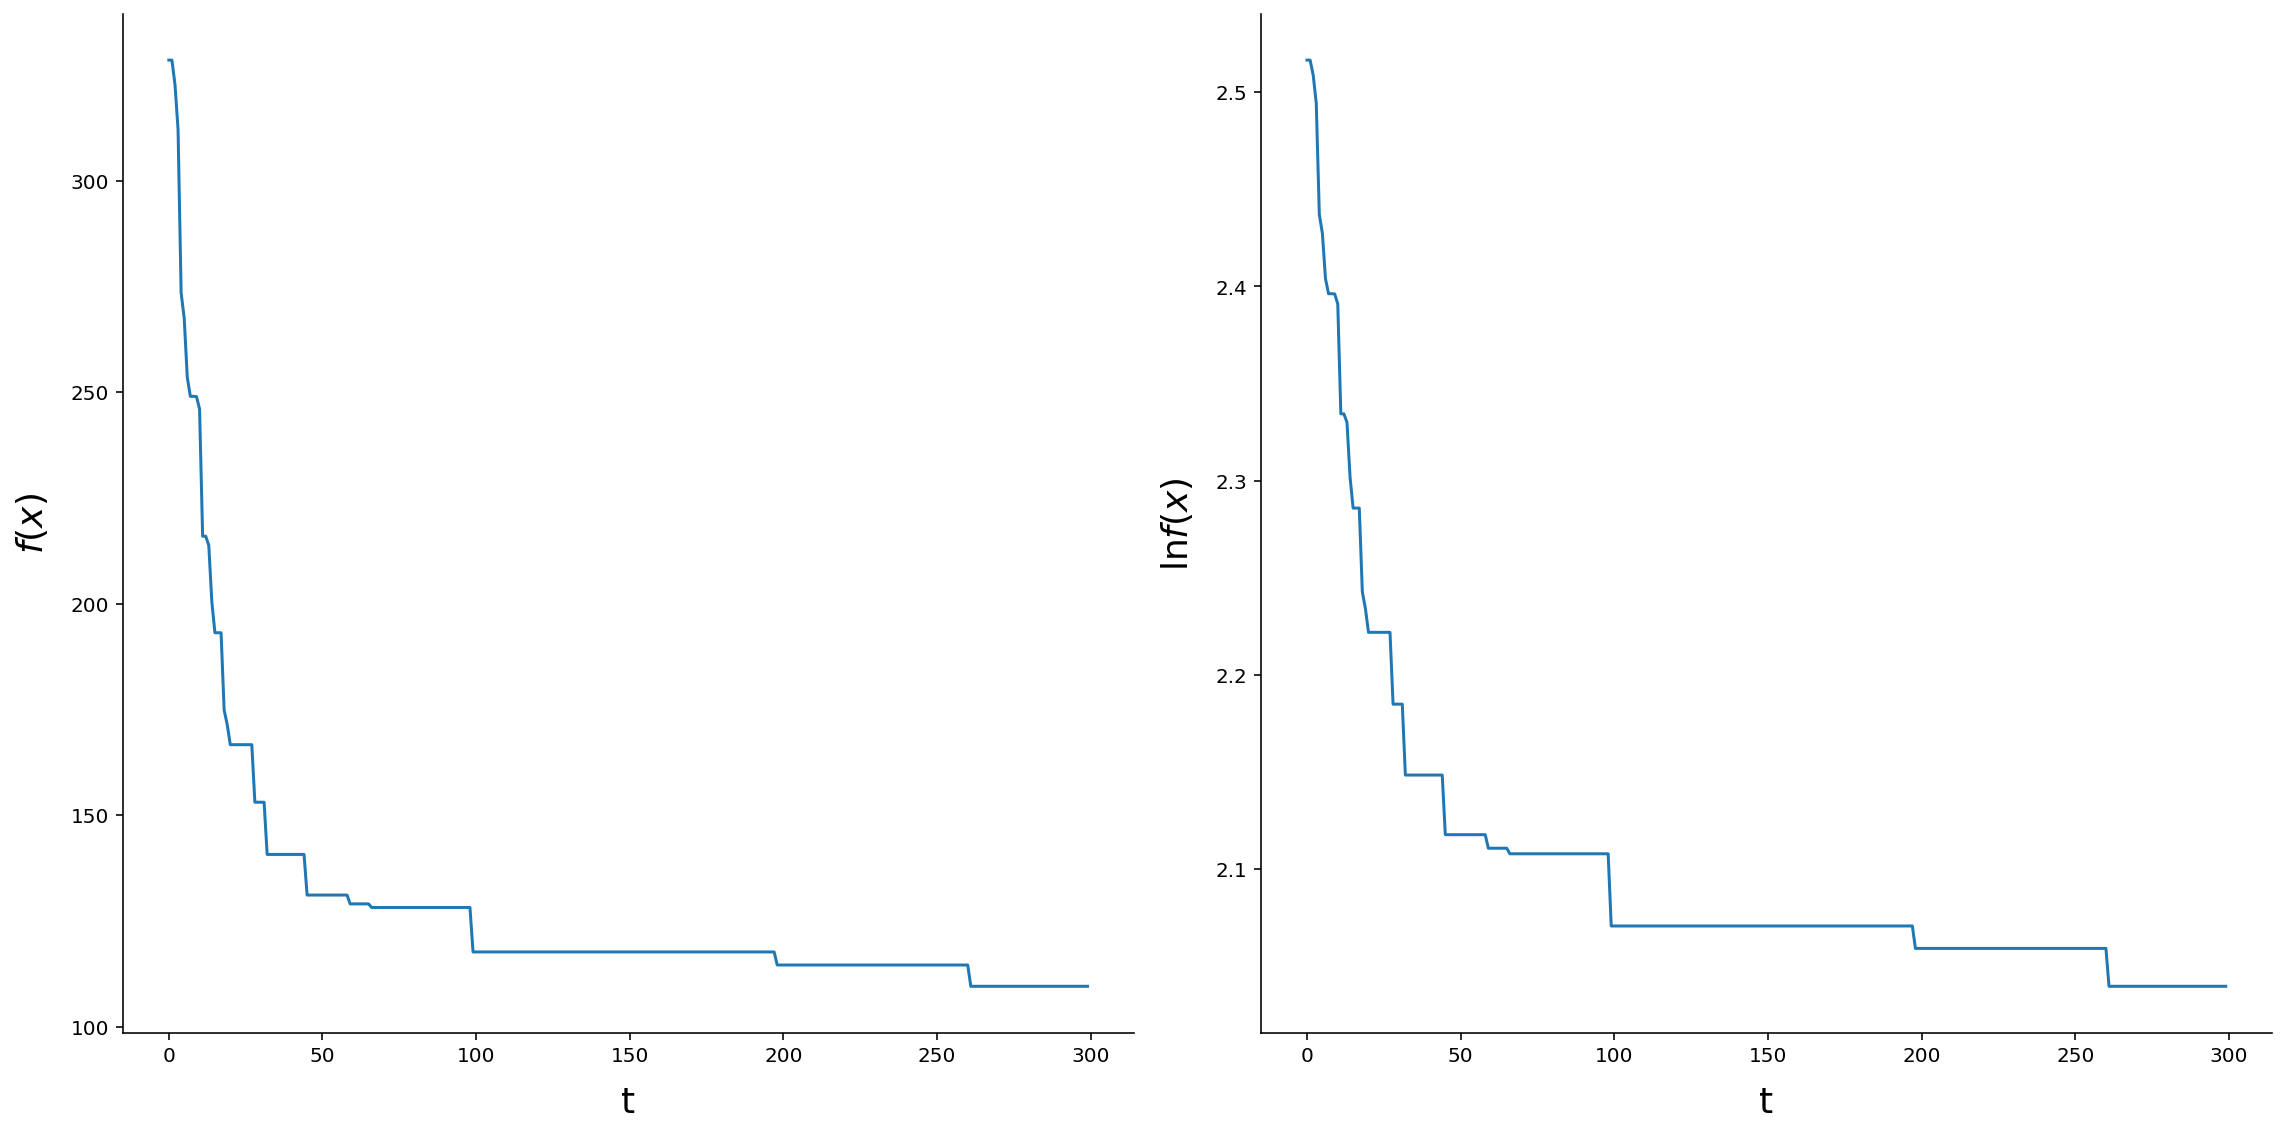

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(test_function.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(test_function.best_target_value_history))

fig.tight_layout()

# Função de Schwefel

In [ ]:
def schwefel_func(x, y):  
    return 418.9829*30 - x * np.sin(np.sqrt(np.abs(x)))-y*np.sin(np.sqrt(np.abs(y)))

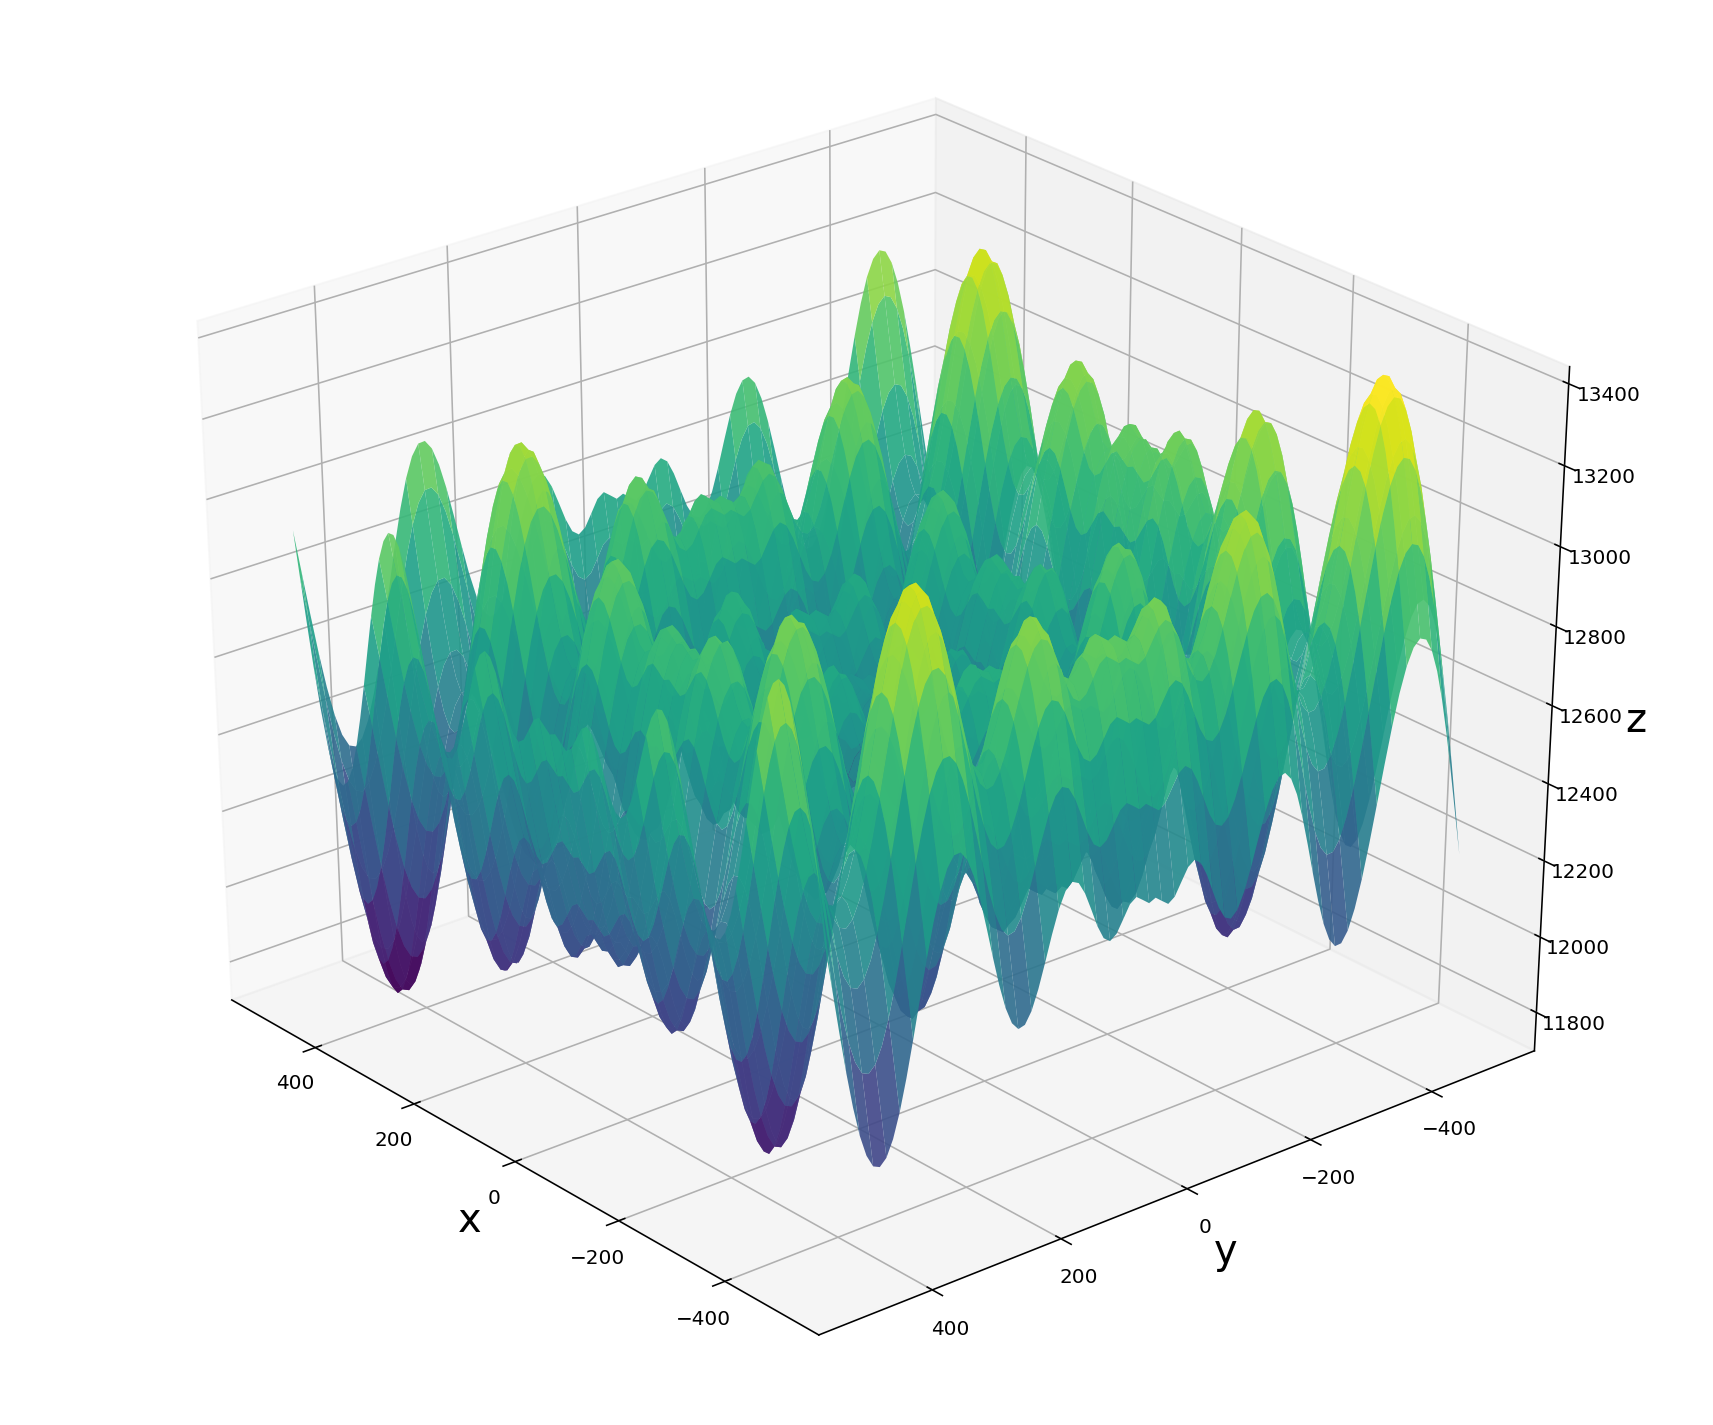

In [ ]:
fig = plt.figure(figsize=(12,10))

# Make grid
x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x, y)
Z = schwefel_func(X, Y)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()

In [ ]:
np.random.seed(13)
test_function = GeneticAlgorithm(k=300, population_size=1000, mutation_rate=0.2, max_iter=300)
test_function.search_global(search_space=[(-500, 500)]*30, func=schwefel)

100%|██████████| 300/300 [04:51<00:00,  1.03it/s]


#0144274: chromosome = (-302.51587029615644; -302.72208434676605; -302.41755192890326; -302.35539628659484; -302.49081751039677; -302.6254883221583; -302.4763678946165; -302.84913927764296; -302.4452322098388; -302.53788562781983; -302.6481360438361; -302.51934957237563; -302.4555021834073; -302.5849958900311; -302.65001458390196; -302.53155445962466; -302.54720308912323; -302.31478479554994; -302.4053906457102; -302.5403203075099; -302.66870816966633; -302.58589537306665; -302.1492485821891; -302.5887279782752; -302.3826681912282; -302.47968058697853; -302.66825957593886; -302.30405495697113; -302.34326771900396; -302.4657451136662);
target_value = 3553.2264955221235

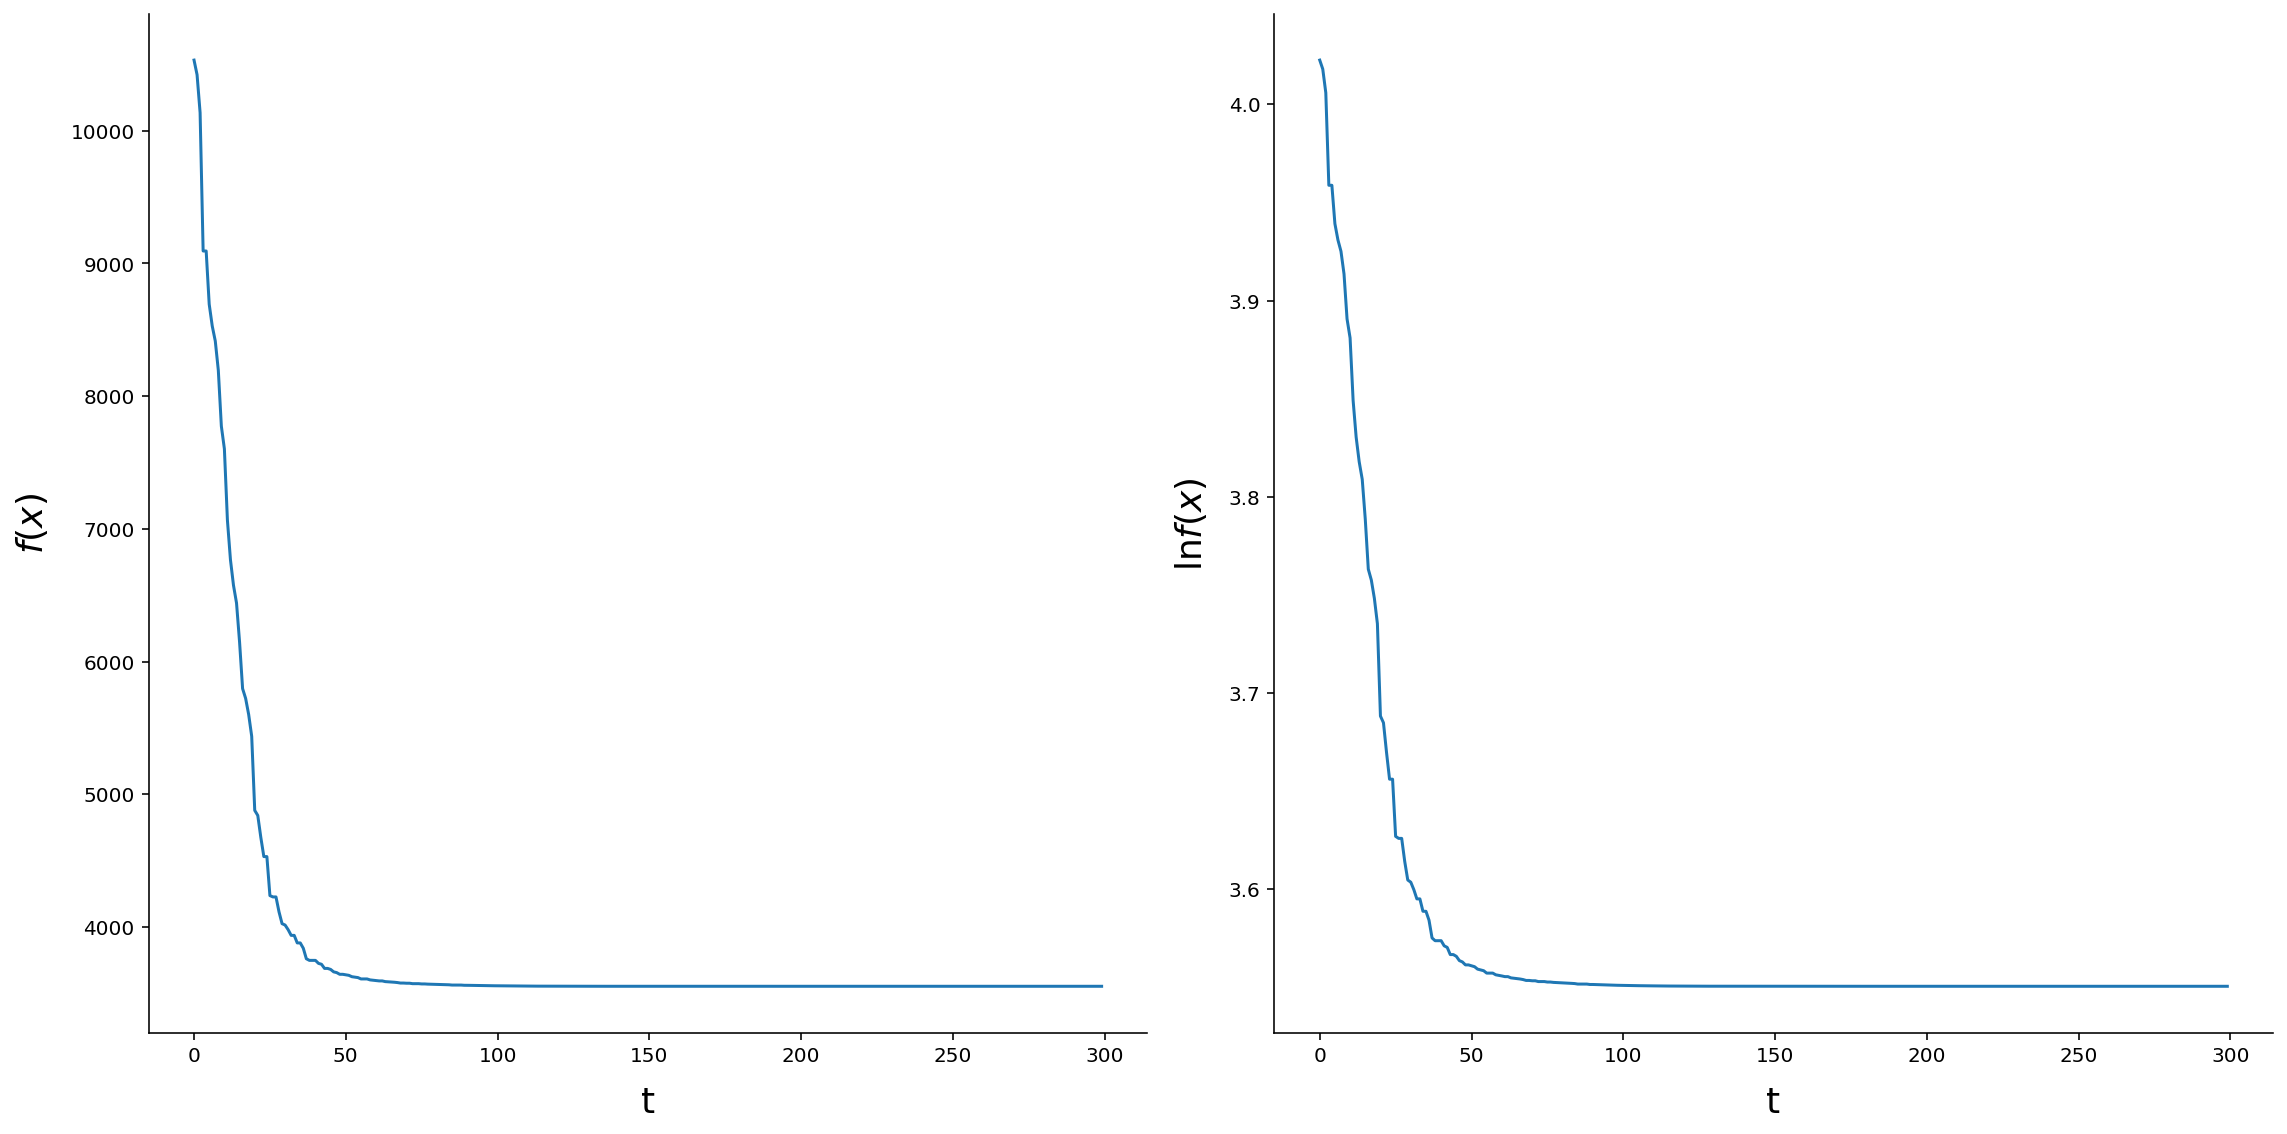

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(test_function.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(test_function.best_target_value_history))

fig.tight_layout()

# Rosenbrock

In [ ]:
##def rosenbrock_func(x, y):
    ##return (0 - x) ** 2 + 100 * (y - x ** 2) ** 2

b = 100;
rosenbrock_func = lambda x,y: (x-1)**2 + b*(y-x**2)**2;

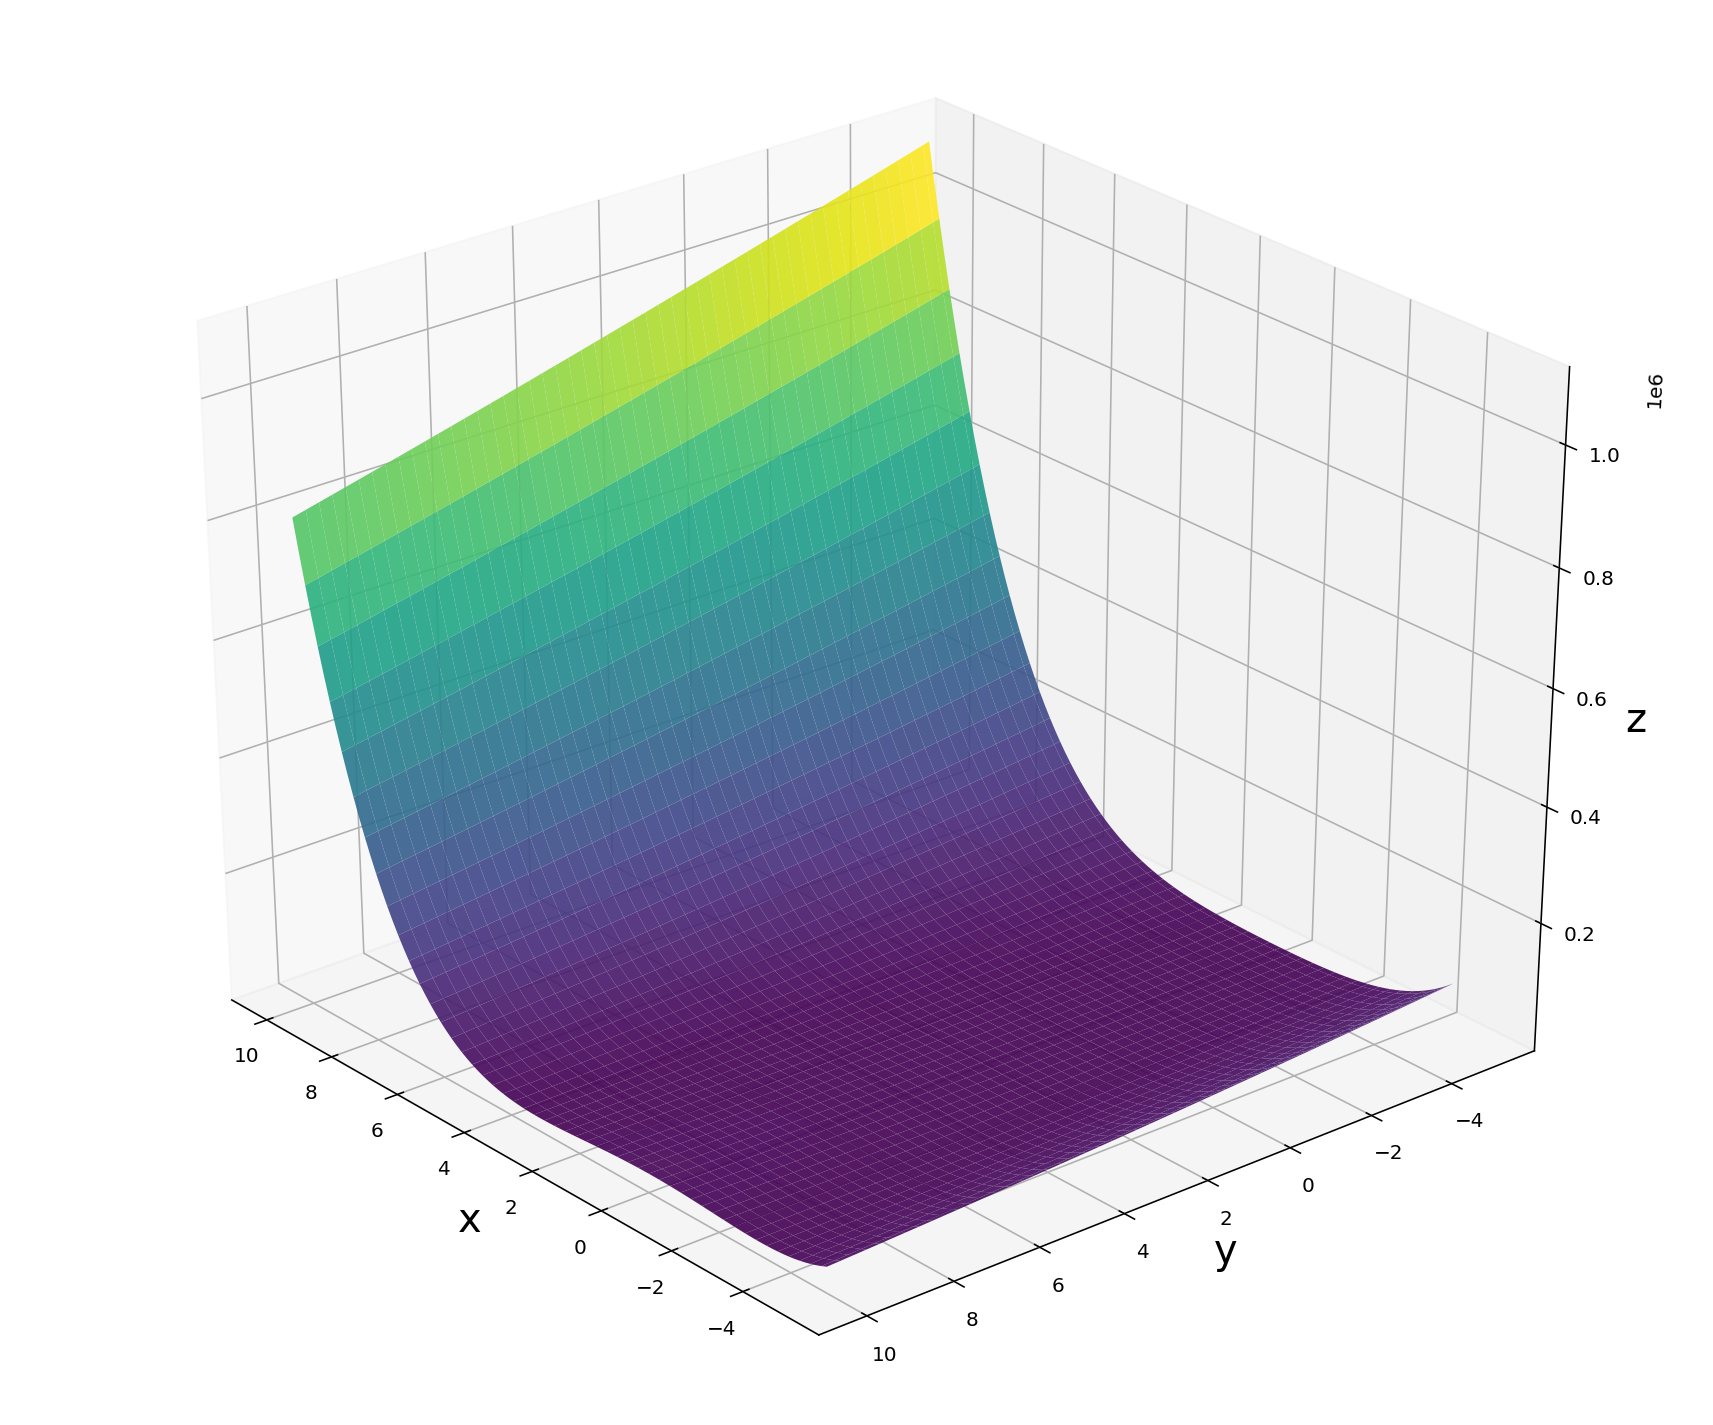

In [ ]:
fig = plt.figure(figsize=(12,10))

# Make grid
x = np.linspace(10, -5, 100)
y = np.linspace(10, -5, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()

In [ ]:
np.random.seed(13)
test_function = GeneticAlgorithm(k=300, population_size=1000, mutation_rate=0.2, max_iter=300)
test_function.search_global(search_space=[(-2.048, 2.048)]*30, func=rosenbrock)

100%|██████████| 300/300 [03:54<00:00,  1.28it/s]


#0601073: chromosome = (-0.38811655199431166; -0.16195609427016888; 0.06981403422114502; -0.3815667546051706; -0.09163561460300634; -0.33827105812395813; -0.4522887333498191; -0.061193647068714; 0.2140771714446699; -0.40213929868663617; -0.4702847111446743; -0.07368424857620859; 0.0064587766575360805; -0.1221348910515318; -0.04820010836210703; 0.2764614085600343; -0.25534057056969517; -0.3180781701675771; -0.09919079867226982; 0.2245706657677335; -0.10658153900690115; 0.44055384321193525; -0.06540867422090169; 0.08448254926730378; -0.11074524571477559; -0.18789132333885397; 0.15265890322434275; 0.009835214668203987; 0.19202707157383514; -0.2568993395222592);
target_value = 13325.50223220847

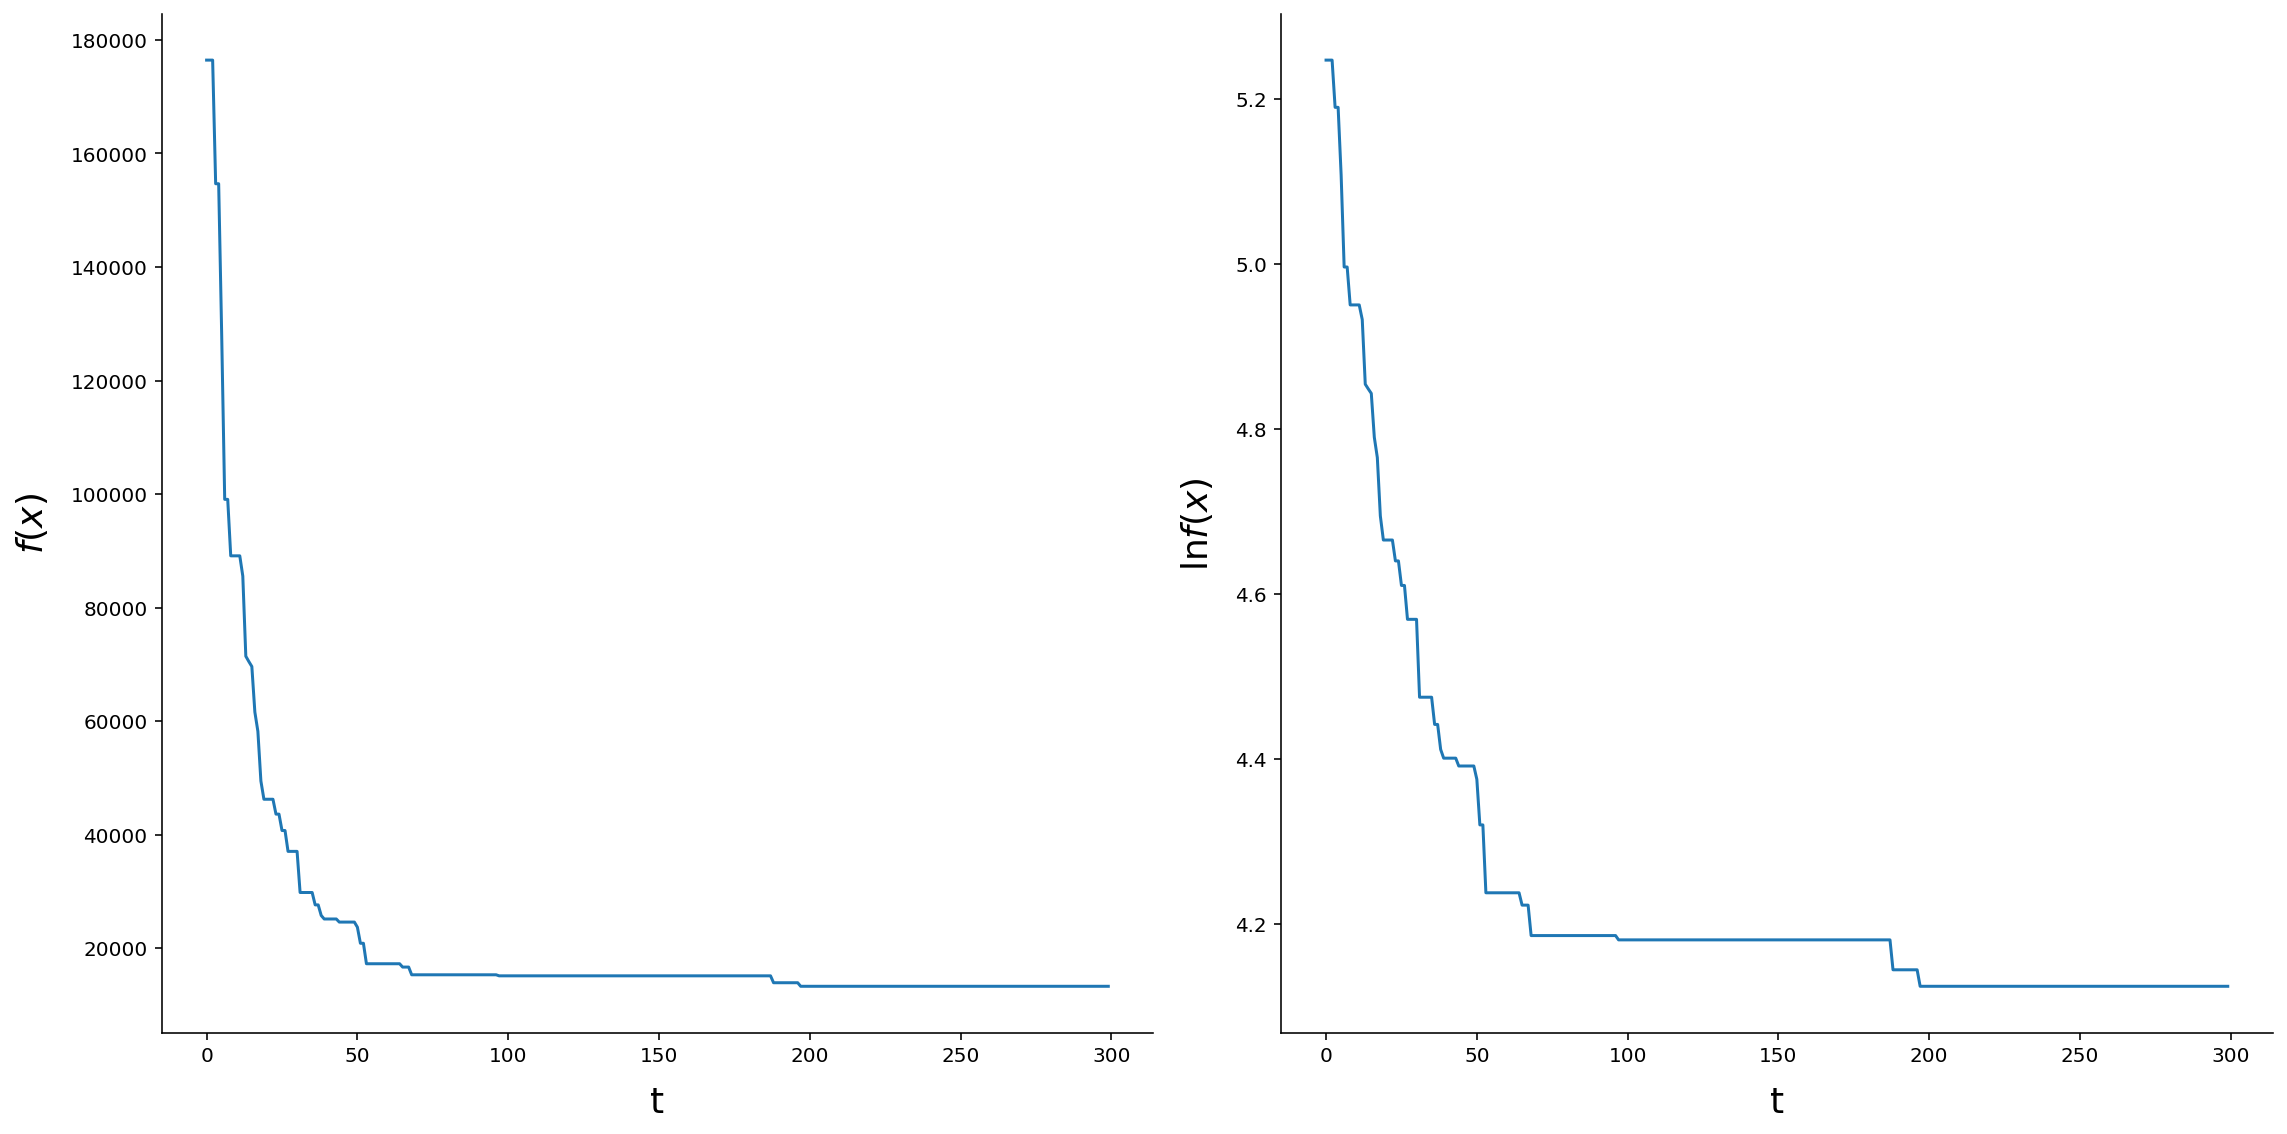

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(test_function.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(test_function.best_target_value_history))

fig.tight_layout()

# Levy

Não consegui plotar essa então vamos direto para execução do algoritmo genético

In [ ]:
np.random.seed(13)
test_function = GeneticAlgorithm(k=300, population_size=1000, mutation_rate=0.2, max_iter=300)
test_function.search_global(search_space=[(-10, 10)]*30, func=levy)

100%|██████████| 300/300 [06:21<00:00,  1.27s/it]


#7388606: chromosome = (1.1268139743464582; 1.0443206185738274; 0.6491906124418589; 1.141455795133664; 1.0819145221782605; 0.6670349032170058; 1.007279895326515; 0.900110995898944; 0.9597316692495906; 1.132969754719873; 1.0923662439680544; 0.8039725792155739; 0.9454590156575894; 0.9824651131566269; 1.0228870597881523; 0.9185948505850733; 0.7493265539712648; 0.8737026927815743; 0.539039256556261; 1.3055279247795; 0.7058826556037953; 1.267595239329511; 0.9507707847628053; 1.1286815267190065; 1.0751237113841143; 0.9187339678420192; 0.8121138757525801; 1.124523963441557; 1.1294150336270117; 0.9702521200931286);
target_value = 0.42107810143383484

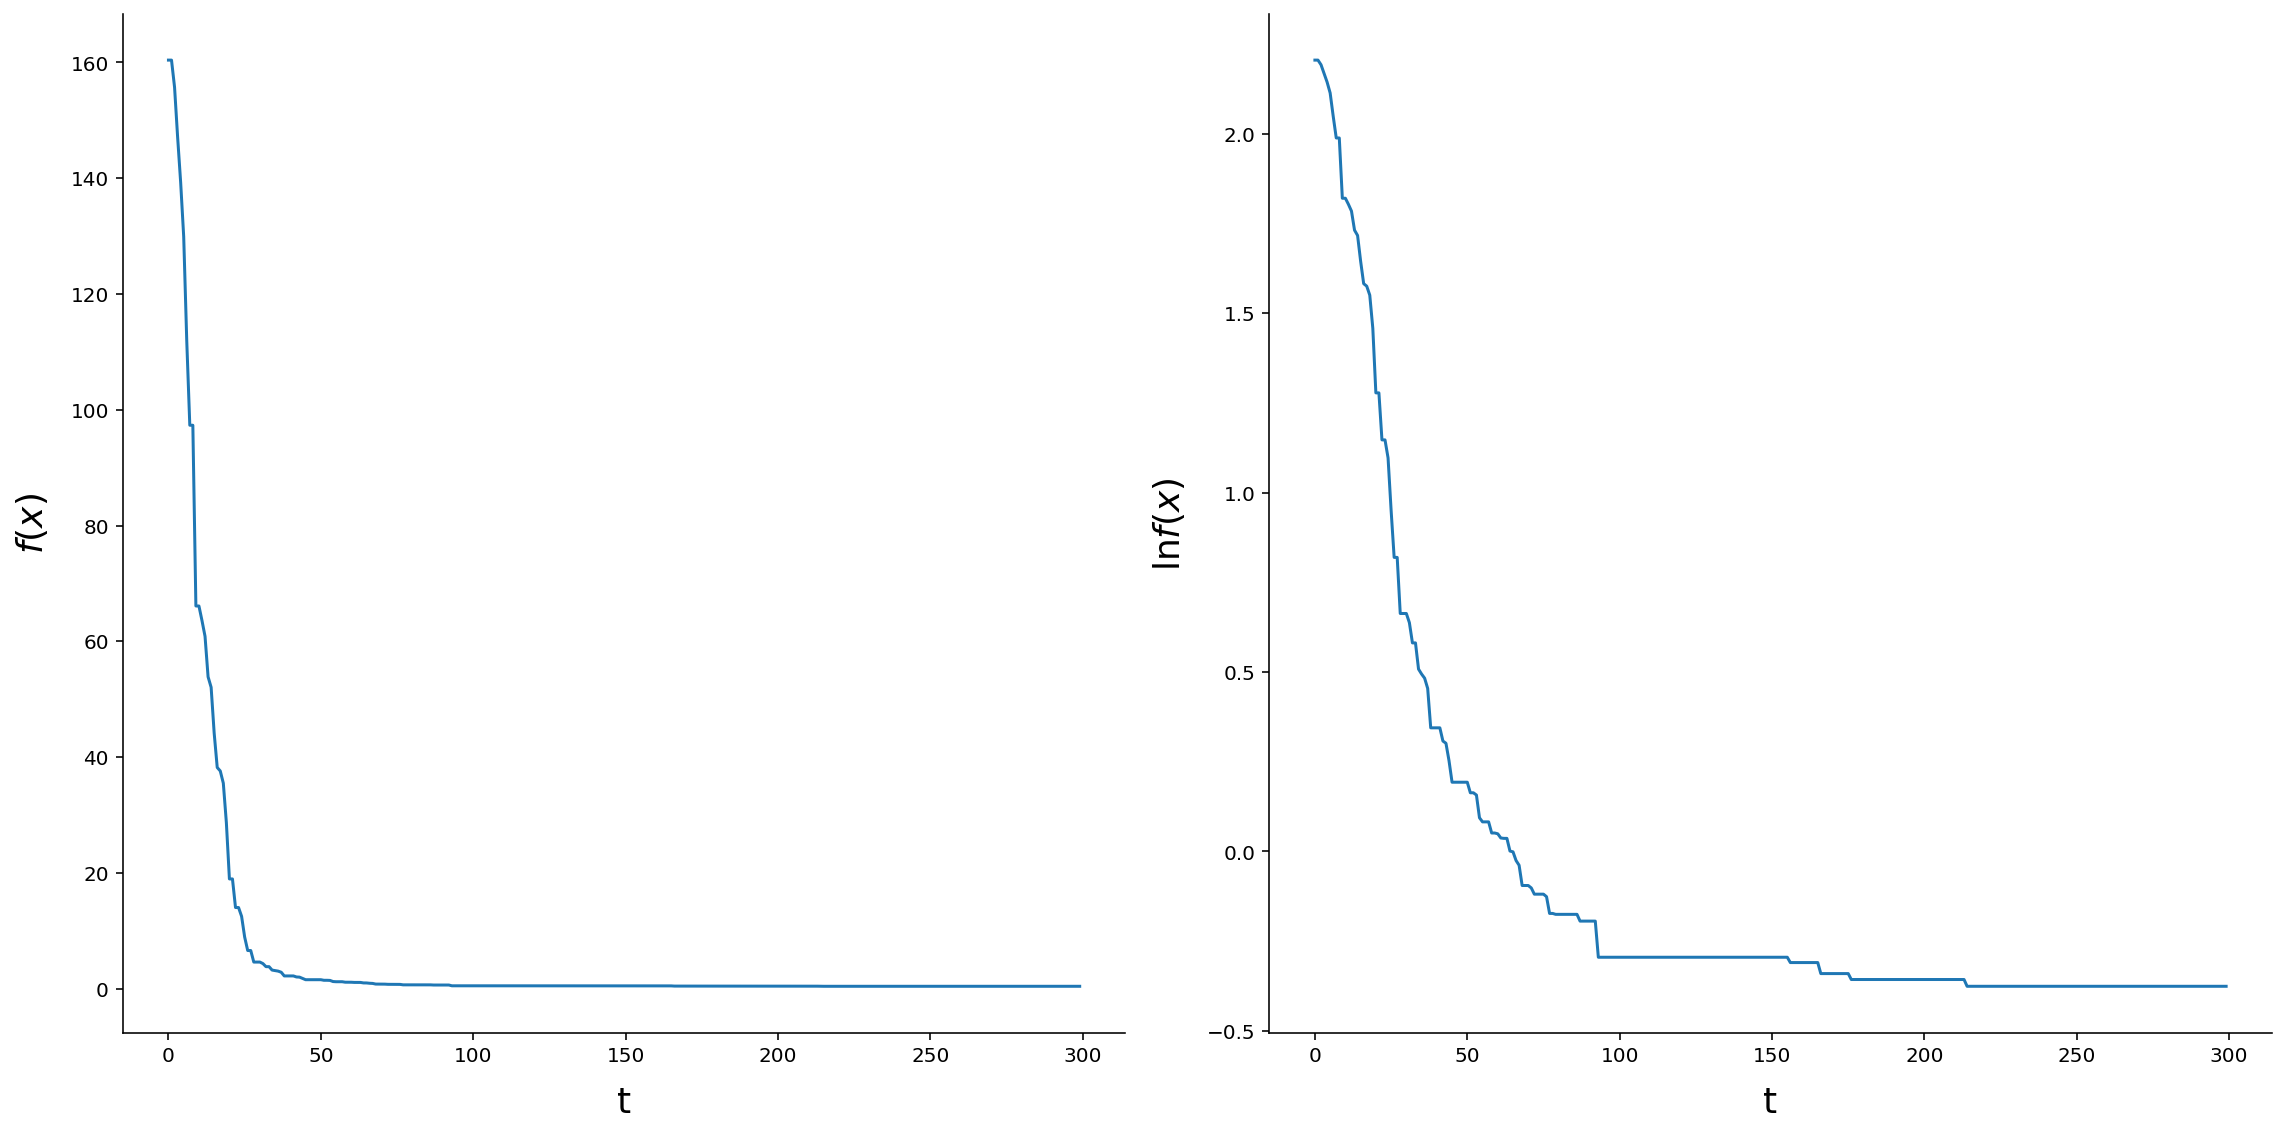

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(test_function.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(test_function.best_target_value_history))

fig.tight_layout()